In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
train=pd.read_csv("Corona_NLP_train.csv",encoding='latin1')

In [3]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
train['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [5]:
train['Location'].value_counts()

London                540
United States         528
London, England       520
New York, NY          395
Washington, DC        373
                     ... 
Belleville, MI          1
Desireland              1
Shawnee, OK, USA        1
Kharghar, Panvel        1
The Delta Quadrant      1
Name: Location, Length: 12220, dtype: int64

In [6]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
train.shape

(41157, 6)

In [8]:
train.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
a=train['Sentiment'].value_counts()

In [11]:
fig = px.bar(a, x=['Positive','Negative','Neutral','Extremely Positive','Extremely Negative'], y='Sentiment',color=['Positive','Negative','Neutral','Extremely Positive','Extremely Negative'])
fig.show()

In [12]:
t=train['Location'].value_counts()[:10]

In [13]:
fig = px.bar(t,y='Location', color=t.index)
fig.show()

In [14]:
t.values

array([540, 528, 520, 395, 373, 337, 281, 268, 232, 225], dtype=int64)

In [15]:
time=train['TweetAt'].to_frame

In [16]:
y=train['Sentiment'].copy()

In [17]:
train['Sentiment']=train['Sentiment'].map({'Positive':0,'Negative':1,'Neutral':2,'Extremely Positive':3,
                                           'Extremely Negative':4})

In [18]:
train['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [19]:
train['OriginalTweet'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [20]:
def cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return  tweet
    

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Akash
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
stop_words = stopwords.words('english')
train['OriginalTweet']=train['OriginalTweet'].apply(lambda x:x.lower())
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train_cleaned = train['OriginalTweet'].apply(cleaner)
train_cleaned.head()

0                                                     
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    food stock empty... please, panic, enough food...
4    ready supermarket outbreak. paranoid, food sto...
Name: OriginalTweet, dtype: object

In [25]:
train['OriginalTweet']=train_cleaned

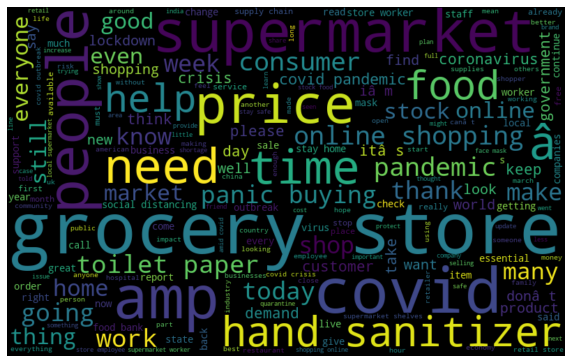

In [26]:
all_words = ' '.join([text for text in train_cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
# Tokenizer class in tensorflow allow us to vectorize 
# a text corpus into sequence of integers

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_cleaned)

X = tokenizer.texts_to_sequences(train_cleaned)

vocab_size = len(tokenizer.word_index)+1



print("Vocabulary size: {}".format(vocab_size))
print("\nExample:\n")
print("Sentence:\n{}".format(train_cleaned[6]))
print("\nAfter tokenizing :\n{}".format(X[6]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[6]))

Vocabulary size: 34757

Example:

Sentence:
cashier grocery store sharing insights prove credibility commented "i'm civics class know talking about".

After tokenizing :
[1023, 6, 3, 1116, 637, 2697, 9271, 9272, 3365, 17401, 1330, 42, 773, 2065]

After padding :
[ 1023     6     3  1116   637  2697  9271  9272  3365 17401  1330    42
   773  2065     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [28]:
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']
           
y.replace(encoding, inplace=True)

In [29]:
tf.keras.backend.clear_session()

# hyper parameters
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256

model = tf.keras.Sequential([
    Layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    Layers.Bidirectional(Layers.LSTM(units,return_sequences=True)),
    Layers.GlobalMaxPool1D(),
    Layers.Dropout(0.4),
    Layers.Dense(64, activation="relu"),
    Layers.Dropout(0.4),
    Layers.Dense(3)
])


model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 16)            556112    
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 512)           559104    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [30]:
#Training our Model
history = model.fit(X, y, epochs=EPOCHS, validation_split=0.12, batch_size=BATCH_SIZE)

Epoch 1/2
1132/1132 [==============================] - 32s 28ms/step - loss: 0.6941 - accuracy: 0.6982 - val_loss: 0.4371 - val_accuracy: 0.8483
Epoch 2/2
1132/1132 [==============================] - 20s 18ms/step - loss: 0.3750 - accuracy: 0.8762 - val_loss: 0.4216 - val_accuracy: 0.8550


In [31]:
model.save('nlp_model.h5')

In [32]:
fig = px.line(
    history.history, y=['accuracy', 'val_accuracy'],
    labels={'index': 'epoch', 'value': 'accuracy'}
)

fig.show()


In [40]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}
)

fig.show()

In [33]:
test=pd.read_csv("Corona_NLP_test.csv")

In [34]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [35]:
test.shape

(3798, 6)

In [64]:
X_test = test['OriginalTweet'].copy()
y_test = test['Sentiment'].copy()

X_test = X_test.apply(cleaner)

X_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post')

y_test.replace(encoding, inplace=True)

<class 'pandas.core.series.Series'>


In [37]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
pred

array([0, 2, 2, ..., 1, 0, 2], dtype=int64)

In [39]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.4668968617916107
Test Accuracy: 0.8220115900039673


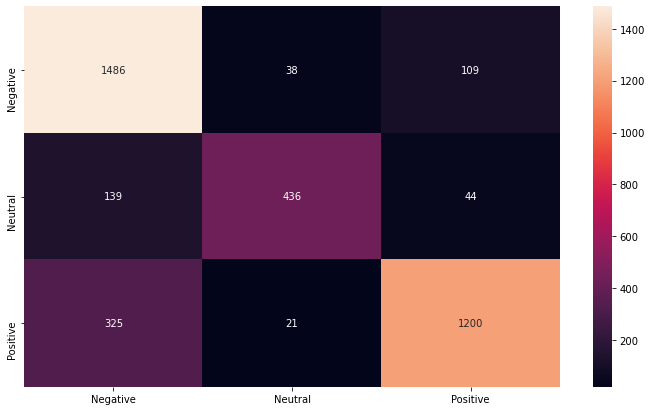

In [40]:
conf = confusion_matrix(y_test, pred)

cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [41]:
print(classification_report(y_test, pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.76      0.91      0.83      1633
     Neutral       0.88      0.70      0.78       619
    Positive       0.89      0.78      0.83      1546

    accuracy                           0.82      3798
   macro avg       0.84      0.80      0.81      3798
weighted avg       0.83      0.82      0.82      3798



In [67]:
X_test = ['very bad worst']
X_test = pd.Series(X_test)
X_test = X_test.apply(cleaner)

X_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post')

print(X_test)
preds = model.predict_classes(X_test)
preds

[[1818  822]]


array([0], dtype=int64)